In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Input
from keras.layers import Conv1D, Conv2D, MaxPooling2D,Conv2DTranspose,UpSampling2D
from keras import regularizers, optimizers,Sequential
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
import keras
from sklearn.metrics import recall_score
from tensorflow.python.keras import backend as K 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import os


from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.inception_resnet_v2 import InceptionResNetV2
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        #print(os.path.join(dirname, filename))
#        print(dirname)
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
os.listdir('/kaggle/')

['src', 'lib', 'input', 'working']

In [3]:
os.listdir('/kaggle/input')

['severstal-steel-defect-detection']

In [4]:
os.listdir('/kaggle/input/severstal-steel-defect-detection')

['sample_submission.csv', 'train.csv', 'train_images', 'test_images']

In [5]:
os.listdir('/kaggle/input/severstal-steel-defect-detection/')
dir1='/kaggle/input/severstal-steel-defect-detection/'

In [6]:
df=pd.read_csv(dir1+'train.csv')

In [7]:
sub=pd.read_csv(dir1+'sample_submission.csv')
sub['imageid']=sub.ImageId_ClassId.apply(lambda x: x.split('_')[0])
sub['class']=sub.ImageId_ClassId.apply(lambda x: int(x.split('_')[1]))
print(sub.shape)
sub.head()


(7204, 4)


,ImageId_ClassId,EncodedPixels,imageid,class
0,004f40c73.jpg_1,1 1,004f40c73.jpg,1
1,004f40c73.jpg_2,1 1,004f40c73.jpg,2
2,004f40c73.jpg_3,1 1,004f40c73.jpg,3
3,004f40c73.jpg_4,1 1,004f40c73.jpg,4
4,006f39c41.jpg_1,1 1,006f39c41.jpg,1


In [8]:
df.fillna(0,inplace=True)
df.head(3)

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,0
2,0002cc93b.jpg_3,0


In [9]:
df['imageid']=df.ImageId_ClassId.apply(lambda x: x.split('_')[0])
df['class']=df.ImageId_ClassId.apply(lambda x: x.split('_')[1])

In [10]:
df.head(3)

,ImageId_ClassId,EncodedPixels,imageid,class
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,0002cc93b.jpg_2,0,0002cc93b.jpg,2
2,0002cc93b.jpg_3,0,0002cc93b.jpg,3


In [11]:
count=0
class_list=[]
class_count=[]
multi_class=[]
dummy=[]
m_class=[]
class_1=[]
class_2=[]
class_3=[]
class_4=[]
no_class=[]
for i in range(0,len(df['EncodedPixels']),4):
    for k in range(0+i,4+i):
        if(df['EncodedPixels'][k]!=0):
            count+=1
            dummy.append(int(df['class'][k]))
            pass
        if(k==i+3 and count>=1):
            multi_class.append(dummy)
            class_count=class_count+dummy
            class_list.append(i)
            A=0
            B=0
            C=0
            D=0
            for x in dummy:
                if(x==1):A=1 
                if(x==2):B=1 
                if(x==3):C=1 
                if(x==4):D=1 
                pass
            m_class.append([A,B,C,D])
            if(count==1):
                class_1.append(i)
                pass
            elif(count==2):
                class_2.append(i)
                pass
            elif(count==3):
                class_3.append(i)
                pass
            elif(count==4):
                class_4.append(i)
                pass
            pass
        elif(k==i+3 and count==0):
            no_class.append(i)
            
    count=0
    dummy=[]
    pass


0.5303946530872056 %  of the Images are Defective are
0.46960534691279443 %  of the Images are Non-Defective are


,class_types,class_count
Defect_classes,Defect_class,6666.0
Non_defect_classes,Non_defect_class,5902.0


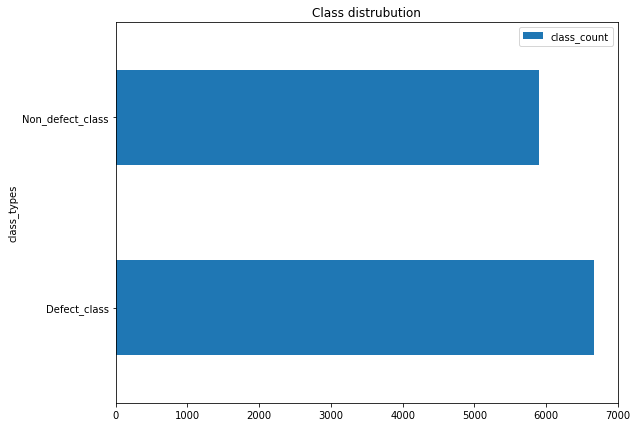

In [12]:
dff=pd.DataFrame({'class_types':['Defect_class','Non_defect_class'],'class_count':[len(class_list),(len(df)/4)-len(class_list)]},index=['Defect_classes','Non_defect_classes'])
dff.plot.barh(x='class_types',y='class_count',figsize=(9,7)).set_title('Class distrubution')

print('='*80)

print(len(class_list)/(len(df)/4),'%  of the Images are Defective are')
print(1-(len(class_list)/(len(df)/4)),'%  of the Images are Non-Defective are')

print('='*80)

dff

--------------------------------------------------------------------------------
Majority class is Class_3 with 4759 Data points
Minority class is Class_2 with 195 Data points


,index,class_count
class_1,class1_Count,769
class_2,class2_Count,195
class_3,class3_Count,4759
class_4,class4_Count,516


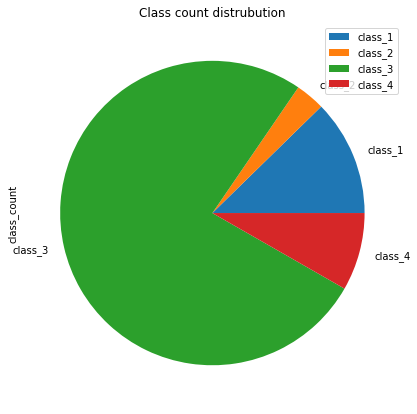

In [13]:
pf=pd.DataFrame({'index':['class1_Count','class2_Count','class3_Count','class4_Count'],'class_count':[multi_class.count([1]),multi_class.count([2]),multi_class.count([3]),multi_class.count([4])]},index=['class_1','class_2','class_3','class_4'])
pf.plot.pie(x='index',y='class_count',figsize=(9,7)).set_title('Class count distrubution')
print('-'*80)
print('Majority class is Class_3 with',pf['class_count'].max(),'Data points')
print('Minority class is Class_2 with',pf['class_count'].min(),'Data points')

print('='*80)
print('='*80)
pf


In [14]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names =["Type", "No.of.classes","Class Id's","Class Data",'Total_Data','~% of Data']
table.add_row(['one class',4,[[1],[2],[3],[4]],list(pf['class_count'].values),len(class_1),float(str(len(class_1)*100/(len(df)/4))[:6]) ])
t=(multi_class.count([1,2])+multi_class.count([1,3])+multi_class.count([2,3])+multi_class.count([2,4])+multi_class.count([3,4]))
table.add_row(['two class',5,[[1,2],[1,3],[2,3],[2,4],[3,4]],[multi_class.count([1,2]),multi_class.count([1,3]),multi_class.count([2,3]),multi_class.count([2,4]),multi_class.count([3,4])],t,float(str((t*100/(len(df)/4)))[:6])])
table.add_row(['Three class',1,[[1,2,3]],len(class_3), len(class_3),float(str(len(class_3)*100/(len(df)/4))[:6])])
table.add_row(['four class',0,np.nan,np.nan, len(class_4),float(str(len(class_4)*100/(len(df)/4))[:6])])
print(table)

+-------------+---------------+------------------------------------------+-----------------------+------------+------------+
|     Type    | No.of.classes |                Class Id's                |       Class Data      | Total_Data | ~% of Data |
+-------------+---------------+------------------------------------------+-----------------------+------------+------------+
|  one class  |       4       |           [[1], [2], [3], [4]]           | [769, 195, 4759, 516] |    6239    |   49.641   |
|  two class  |       5       | [[1, 2], [1, 3], [2, 3], [2, 4], [3, 4]] |  [35, 91, 14, 1, 284] |    425     |   3.3816   |
| Three class |       1       |               [[1, 2, 3]]                |           2           |     2      |   0.0159   |
|  four class |       0       |                   nan                    |          nan          |     0      |    0.0     |
+-------------+---------------+------------------------------------------+-----------------------+------------+------------+


In [15]:
id0=df.iloc[no_class, [2]]
id1=df.iloc[class_list,[2]]
id0['binary_class']=[0]*len(id0)

id1['binary_class']=[1]*len(id1)
df_binary=sklearn.utils.shuffle(pd.concat([id0,id1], axis=0))
df_binary['binary_class']=df_binary['binary_class'].astype(str)
print(df_binary.shape)
df_binary.head()

(12568, 2)


,imageid,binary_class
10508,351077c4c.jpg,0
32092,a345caa40.jpg,1
50256,fff02e9c5.jpg,1
36152,b6e3b8a8c.jpg,0
5364,1b213d816.jpg,1


In [16]:
df0=df.iloc[no_class, [2]]
df0['class1']=[0]*len(id0)
df0['class2']=[0]*len(id0)
df0['class3']=[0]*len(id0)
df0['class4']=[0]*len(id0)
df0['any_class']=['0']*len(id0)
print(df0.shape)
df0.head()

(5902, 6)


,imageid,class1,class2,class3,class4,any_class
4,00031f466.jpg,0,0,0,0,0
8,000418bfc.jpg,0,0,0,0,0
12,000789191.jpg,0,0,0,0,0
32,001982b08.jpg,0,0,0,0,0
36,001d1b355.jpg,0,0,0,0,0


In [17]:
mid=df.iloc[class_list,[2]]
columns =['class1','class2','class3','class4']
mulc=pd.DataFrame(m_class,columns =columns,index=mid.index)
mulc['any_class']=[1]*len(mulc)
mulc=pd.concat([mid,mulc], axis=1)
mc=pd.concat([mulc,df0], axis=0)
print(mc.shape)
mc.head()

(12568, 6)


,imageid,class1,class2,class3,class4,any_class
0,0002cc93b.jpg,1,0,0,0,1
16,0007a71bf.jpg,0,0,1,0,1
20,000a4bcdd.jpg,1,0,0,0,1
24,000f6bf48.jpg,0,0,0,1,1
28,0014fce06.jpg,0,0,1,0,1


In [18]:
mc['any_class'].value_counts()

1    6666
0    5902
Name: any_class, dtype: int64

### Datagen

In [19]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, df, target_df=None, mode='fit',
                 base_path='../input/severstal-steel-defect-detection/train_images',
                 batch_size=16, dim=(128, 800),preprocess=None, n_channels=3,
                 n_classes=1, random_state=2019, shuffle=False):
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.mode = mode
        self.preprocess = preprocess
        self.base_path = base_path
        self.target_df = target_df
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.random_state = random_state
        self.on_epoch_end()
    

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        #print(indexes)
        # Find list of IDs
        list_IDs_batch = [self.list_IDs[k] for k in indexes]
        
        X = self.__generate_X(list_IDs_batch)
        
            
        if self.mode == 'fit':
            y = self.__generate_y(list_IDs_batch)
            return X, y
        
        elif self.mode == 'predict':
            return X

        else:
            raise AttributeError('The mode parameter should be set to "fit" or "predict".')
        
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.seed(self.random_state)
            np.random.shuffle(self.indexes)
    
    def __generate_X(self, list_IDs_batch):
        'Generates data containing batch_size samples'
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        
        # Generate data
        for i, ID in enumerate(list_IDs_batch):
            #print(i,ID)
            im_name = self.df['imageid'][ID]
            img_path = f"{self.base_path}/{im_name}"
            img = self.__load_rgb(img_path)
            #print(im_name,img_path)
            # Store samples
            img = cv2.resize(img,(800,128))
            X[i,] = img 
            #print(" X sahpe",X.shape)
            #print(" img sahpe",img.shape)
            # normalize 
            #X = X / 255
        if self.preprocess!=None: X = self.preprocess(X)

        return X
    
    def __generate_y(self, list_IDs_batch):
        y = np.empty((self.batch_size, *self.dim, self.n_classes), dtype=int)
        
        for i, ID in enumerate(list_IDs_batch):
            im_name = self.df['imageid'][ID]
            #image_df = self.target_df[self.target_df['imageid'] == im_name]
            
            rles = self.df['EncodedPixels'][ID]
            h,w=self.dim
            masks = rle_to_mask(rles, 256,1600)
            masks = cv2.resize(masks,(800,128))

            #print(" y sahpe",y.shape)
            #print(" masks sahpe",masks.shape)
            y[i, ] = np.expand_dims(masks, -1)
            y = (y > 0).astype(int)
        return y 

        
    
    def __load_rgb(self, img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32) / 255.

        return img
    
    def __load_grayscale(self, img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img.astype(np.float32) / 255.
        img = np.expand_dims(img, axis=-1)

        return img

# Binary Missing

In [20]:
from keras import backend as K
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
#Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.
#TPR
def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

In [21]:
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

## Multi missing

 ##  mask pred

### Data

In [22]:
#This dataframe is for prediction
nf=df[['imageid','EncodedPixels','class']][df['EncodedPixels']!=0]
nf['class1']=nf['class'].apply(lambda c:1 if int(c)==1 else 0)
nf['class2']=nf['class'].apply(lambda c:1 if int(c)==2 else 0)
nf['class3']=nf['class'].apply(lambda c:1 if int(c)==3 else 0)
nf['class4']=nf['class'].apply(lambda c:1 if int(c)==4 else 0)
print("shape of dataframe:",nf.shape)
nf.head()

shape of dataframe: (7095, 7)


,imageid,EncodedPixels,class,class1,class2,class3,class4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,1,1,0,0,0
18,0007a71bf.jpg,18661 28 18863 82 19091 110 19347 110 19603 11...,3,0,0,1,0
20,000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,1,1,0,0,0
27,000f6bf48.jpg,131973 1 132228 4 132483 6 132738 8 132993 11 ...,4,0,0,0,1
30,0014fce06.jpg,229501 11 229741 33 229981 55 230221 77 230468...,3,0,0,1,0


In [23]:
c1=nf[nf['class1']!=0]
c2=nf[nf['class2']!=0]
c3=nf[nf['class3']!=0]
c4=nf[nf['class4']!=0]
print("Class1 data shape",c1.shape)
print("Class2 data shape",c2.shape)
print("Class3 data shape",c3.shape)
print("Class4 data shape",c4.shape)

Class1 data shape (897, 7)
Class2 data shape (247, 7)
Class3 data shape (5150, 7)
Class4 data shape (801, 7)


In [24]:
pip install segmentation-models

     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
Note: you may need to restart the kernel to use updated packages.


In [25]:
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
#model = Unet('resnet34')

/opt/conda/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [26]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)
    pass

NameError: name 'model' is not defined

In [27]:
# LOAD UNET WITH PRETRAINING FROM IMAGENET
preprocess = get_preprocessing('resnet50') # for resnet, img = (img-110.0)/1.0
#model = Unet('resnet34', input_shape=(128, 800, 3), classes=1, activation='sigmoid')

In [28]:
def rle_to_mask(rle_string, height, width):
    
    rows, cols = height, width
    img = np.zeros(rows * cols, dtype=np.uint8)
    if len(str(rle_string)) > 1:
        rle_numbers = [int(numstring) for numstring in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1, 2)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
    else: img = np.zeros(cols*rows)
    img = img.reshape(cols, rows)
    img = img.T
    return img


def mask_to_rle(mask):
    '''
    Convert a mask into RLE
    
    Parameters: 
    mask (numpy.array): binary mask of numpy array where 1 - mask, 0 - background

    Returns: 
    sring: run length encoding 
    '''
    pixels= mask.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [29]:
'metric and loss function for evaluation'
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def loss_dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return -K.log((2 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

In [30]:
def load(BATCH_SIZE,index_df,dff,dimn):
    
    train_idx, val_idx = train_test_split(
    index_df.index,  # Index matters for each prediction class
    random_state=2019, 
    test_size=0.15)

    train_generator = DataGenerator(
        train_idx, 
        df=dff,
        dim=dimn,
        batch_size=BATCH_SIZE, 
        n_classes=1)

    val_generator = DataGenerator(
        val_idx, 
        df=nf,
        dim=dimn,
        batch_size=BATCH_SIZE, 
        n_classes=1)
    
    
    return train_generator,val_generator

In [31]:
#Load data
trainc1,valc1=load(32,c1,nf,dimn=(128,800))


In [32]:
# LOAD UNET WITH PRETRAINING FROM IMAGENET
 

In [33]:
pred_c1 = Unet('resnet50', input_shape=(128, 800, 3), classes=1, activation='sigmoid')
pred_c1.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef,loss_dice_coef])
#pred_c1.summary()

94593024/94592056 [==============================] - 7s 0us/step


In [34]:
#fit data gen
history = pred_c1.fit_generator(
    trainc1,
    validation_data=valc1,
    use_multiprocessing=False,
    workers=1,
    epochs=25 )

Epoch 1/25
23/23 [==============================] - 42s 2s/step - loss: 0.5249 - dice_coef: 0.0253 - loss_dice_coef: 3.6829 - val_loss: 0.9976 - val_dice_coef: 0.0187 - val_loss_dice_coef: 3.9930
Epoch 2/25
23/23 [==============================] - 17s 747ms/step - loss: 0.1964 - dice_coef: 0.0310 - loss_dice_coef: 3.4886 - val_loss: 0.2413 - val_dice_coef: 0.0338 - val_loss_dice_coef: 3.3926
Epoch 3/25
23/23 [==============================] - 18s 792ms/step - loss: 0.0983 - dice_coef: 0.0758 - loss_dice_coef: 2.6078 - val_loss: 0.0893 - val_dice_coef: 0.0799 - val_loss_dice_coef: 2.5289
Epoch 4/25
23/23 [==============================] - 18s 790ms/step - loss: 0.0621 - dice_coef: 0.1443 - loss_dice_coef: 1.9520 - val_loss: 0.0537 - val_dice_coef: 0.1233 - val_loss_dice_coef: 2.0942
Epoch 5/25
23/23 [==============================] - 18s 794ms/step - loss: 0.0463 - dice_coef: 0.2115 - loss_dice_coef: 1.5598 - val_loss: 0.0452 - val_dice_coef: 0.1497 - val_loss_dice_coef: 1.9009
Epoch 6/

In [35]:
pred_c1.save_weights('r50_c1_weights')


In [36]:
pred_c1.save("mod_r50_c1.h5")
print("Saved model to disk")

Saved model to disk


### Class2

In [37]:
#Load data
trainc2,valc2=load(32,c2,nf,dimn=(128,800))
pred_c2 = Unet('resnet50', input_shape=(128, 800, 3), classes=1, activation='sigmoid')
pred_c2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef,loss_dice_coef])
#pred_c2.summary()

In [38]:
#fit data gen
history2 = pred_c2.fit_generator(
    trainc2,
    validation_data=valc2,
    use_multiprocessing=False,
    workers=1,
    epochs=25)

Epoch 1/25
6/6 [==============================] - 24s 4s/step - loss: 0.6152 - dice_coef: 0.0214 - loss_dice_coef: 3.8484 - val_loss: 1.6163 - val_dice_coef: 0.0218 - val_loss_dice_coef: 3.8254
Epoch 2/25
6/6 [==============================] - 5s 765ms/step - loss: 0.3633 - dice_coef: 0.0211 - loss_dice_coef: 3.8592 - val_loss: 0.3743 - val_dice_coef: 0.0123 - val_loss_dice_coef: 4.3947
Epoch 3/25
6/6 [==============================] - 5s 851ms/step - loss: 0.2776 - dice_coef: 0.0203 - loss_dice_coef: 3.8998 - val_loss: 0.2135 - val_dice_coef: 0.0112 - val_loss_dice_coef: 4.4905
Epoch 4/25
6/6 [==============================] - 5s 829ms/step - loss: 0.2198 - dice_coef: 0.0225 - loss_dice_coef: 3.7963 - val_loss: 0.1961 - val_dice_coef: 0.0166 - val_loss_dice_coef: 4.0992
Epoch 5/25
6/6 [==============================] - 5s 886ms/step - loss: 0.1779 - dice_coef: 0.0245 - loss_dice_coef: 3.7139 - val_loss: 0.1932 - val_dice_coef: 0.0207 - val_loss_dice_coef: 3.8790
Epoch 6/25
6/6 [======

In [39]:
pred_c2.save_weights('r50_c2_weights')


In [40]:

pred_c2.save("mod_r50_c2.h5")
print("Saved model to disk")

Saved model to disk


### Class3

In [41]:
#Load data
trainc3,valc3=load(8,c3,nf,dimn=(128,800))
pred_c3 = Unet('resnet50', input_shape=(128, 800, 3), classes=1, activation='sigmoid')
pred_c3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef,loss_dice_coef])
#pred_c3.summary()


In [42]:
#fit data gen
history3 = pred_c3.fit_generator(
    trainc3,
    validation_data=valc3,
    use_multiprocessing=False,
    workers=1,
    epochs=30 )

Epoch 1/30
547/547 [==============================] - 156s 284ms/step - loss: 0.1406 - dice_coef: 0.4088 - loss_dice_coef: 0.9511 - val_loss: 0.1535 - val_dice_coef: 0.4166 - val_loss_dice_coef: 0.9043
Epoch 2/30
547/547 [==============================] - 135s 247ms/step - loss: 0.1097 - dice_coef: 0.4993 - loss_dice_coef: 0.7074 - val_loss: 0.1051 - val_dice_coef: 0.5076 - val_loss_dice_coef: 0.6924
Epoch 3/30
547/547 [==============================] - 137s 250ms/step - loss: 0.1028 - dice_coef: 0.5273 - loss_dice_coef: 0.6524 - val_loss: 0.7851 - val_dice_coef: 0.2909 - val_loss_dice_coef: 1.3274
Epoch 4/30
547/547 [==============================] - 135s 248ms/step - loss: 0.0987 - dice_coef: 0.5423 - loss_dice_coef: 0.6227 - val_loss: 0.1026 - val_dice_coef: 0.5056 - val_loss_dice_coef: 0.6991
Epoch 5/30
547/547 [==============================] - 137s 250ms/step - loss: 0.0962 - dice_coef: 0.5551 - loss_dice_coef: 0.5995 - val_loss: 0.0993 - val_dice_coef: 0.5639 - val_loss_dice_coe

In [43]:
pred_c3.save_weights('r50_c3_weights')

In [44]:

pred_c3.save("mod_r50_c3.h5")
print("Saved model to disk")

Saved model to disk


### Class4

In [45]:
#Load data
trainc4,valc4=load(32,c4,nf,dimn=(128,800))
pred_c4 = Unet('resnet50', input_shape=(128, 800, 3), classes=1, activation='sigmoid')
pred_c4.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef,loss_dice_coef])
#pred_c4.summary()

In [46]:
#fit data gen
history4 = pred_c4.fit_generator(
    trainc4,
    validation_data=valc4,
    use_multiprocessing=False,
    workers=1,
    epochs=30)

Epoch 1/30
21/21 [==============================] - 43s 2s/step - loss: 0.4461 - dice_coef: 0.2571 - loss_dice_coef: 1.3783 - val_loss: 0.8721 - val_dice_coef: 0.2592 - val_loss_dice_coef: 1.3533
Epoch 2/30
21/21 [==============================] - 16s 759ms/step - loss: 0.2354 - dice_coef: 0.3740 - loss_dice_coef: 0.9875 - val_loss: 0.9419 - val_dice_coef: 0.3371 - val_loss_dice_coef: 1.0896
Epoch 3/30
21/21 [==============================] - 18s 860ms/step - loss: 0.1577 - dice_coef: 0.4769 - loss_dice_coef: 0.7425 - val_loss: 0.1671 - val_dice_coef: 0.5048 - val_loss_dice_coef: 0.6870
Epoch 4/30
21/21 [==============================] - 17s 833ms/step - loss: 0.1191 - dice_coef: 0.5708 - loss_dice_coef: 0.5625 - val_loss: 0.1589 - val_dice_coef: 0.5420 - val_loss_dice_coef: 0.6170
Epoch 5/30
21/21 [==============================] - 17s 833ms/step - loss: 0.0961 - dice_coef: 0.6430 - loss_dice_coef: 0.4423 - val_loss: 0.1625 - val_dice_coef: 0.5936 - val_loss_dice_coef: 0.5232
Epoch 6/

In [47]:
pred_c4.save_weights('r50_c4_weights')


In [48]:
pred_c4.save("mod_r50_c4.h5")
print("Saved model to disk")

Saved model to disk
